[RandomForestRegressor]
#Features: 11
MSE train: 195.70, test: 1290.06
R^2 train: 0.99, test: 0.92


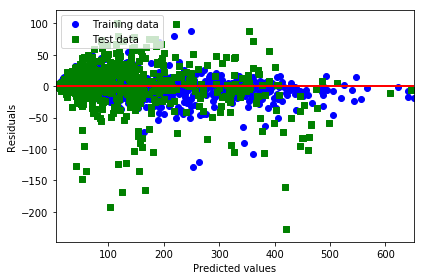

[Polynomial Regression(cubic)]
#Features: 364
MSE train: 4464.97, test: 4629.35
R^2 train: 0.71, test: 0.73


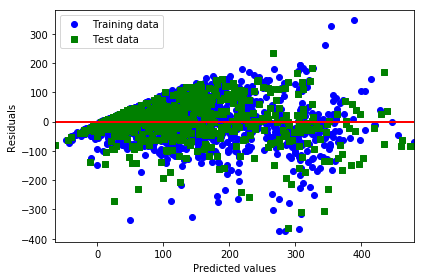

In [2]:
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()


def residual_plot(y_train, y_train_pred, y_test, y_test_pred):
  # Residual plot
  plt.scatter(
      y_train_pred,
      y_train_pred - y_train,
      c='blue',
      marker='o',
      label='Training data')

  plt.scatter(
      y_test_pred,
      y_test_pred - y_test,
      c='green',
      marker='s',
      label='Test data')

  plt.xlabel('Predicted values')
  plt.ylabel('Residuals')
  plt.legend(loc='upper left')
  xmin = min(y_train_pred.min(), y_test_pred.min())
  xmax = max(y_train_pred.max(), y_test_pred.max())
  plt.hlines(y=0, xmin=xmin, xmax=xmax, lw=2, color='red')
  plt.xlim([xmin, xmax])
  plt.tight_layout()
  plt.show()

class LinearRegressionGD(object):

  def __init__(self, eta=0.00002, n_iter=150000, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state

  def fit(self, X, y):
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:]) + self.w_[0]

  def predict(self, X):
    return self.net_input(X)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=3)

print('[RandomForestRegressor]')
print('#Features: %d' % X_train.shape[1])

forest = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

# Residual plot
residual_plot(y_train, y_train_pred, y_test, y_test_pred)


cubic = PolynomialFeatures(degree=3)
X_train = cubic.fit_transform(X_train)
X_test = cubic.transform(X_test)


sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)


# Training

lr = LinearRegressionGD()
lr.fit(X_train_std, y_train)

# Testing

y_train_pred = lr.predict(X_train_std)
y_test_pred = lr.predict(X_test_std)

print('[Polynomial Regression(cubic)]')
print('#Features: %d' % X_train.shape[1])
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

residual_plot(y_train, y_train_pred, y_test, y_test_pred)
